In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np
import os
import tqdm
import keras

from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, image
from keras.applications.densenet import DenseNet169,preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.initializers import glorot_uniform
from keras.models import Model
from keras.layers import Dense, Activation ,Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping, TensorBoard

In [0]:
DATASET_DIR  = '/gdrive/My Drive/MURA/'
TRAIN_DIR    = DATASET_DIR + 'MURA-v1.2/train/'
VAL_DIR      = DATASET_DIR + 'MURA-v1.2/valid/'
PART_NAME    = 'XR_SHOULDER'
TRAIN_LABELS = DATASET_DIR+'train_labeled_studies.csv'
VAL_LABELS   = DATASET_DIR+'valid_labeled_studies.csv'

In [0]:
train_labels = pd.read_csv(TRAIN_LABELS, header = None)
val_labels   = pd.read_csv(VAL_LABELS, header = None)

In [0]:
train_labels = train_labels.set_index(0).T.to_dict('list')
val_labels = val_labels.set_index(0).T.to_dict('list')

In [0]:
def prepare_data(labels, data_path, part, mode):
    BASE_DIR = 'MURA-v1.1/'+mode+'/'+part+'/'
    FILE_DIR = 'MURA-v1.2/'+mode+'/'+part+'/'
    df = pd.DataFrame(columns = ['Path', 'Label'])
    i=0
    for patient in os.listdir(data_path):
        for study in os.listdir(data_path+'/'+patient):
            for img in os.listdir(data_path+'/'+patient+'/'+study):
                if '_' not in list(img):
                    path = FILE_DIR+patient+'/'+study+'/'
                    label_path = BASE_DIR+patient+'/'+study+'/'
                    df.loc[i] = [path+img, int(labels[label_path][0])]
                    i=i+1
    return df
    

In [0]:
train_data = prepare_data(train_labels, TRAIN_DIR+PART_NAME, PART_NAME,'train')
val_data = prepare_data(val_labels, VAL_DIR+PART_NAME, PART_NAME,'valid')

In [0]:
train_data

,Path,Label
0,MURA-v1.2/train/XR_SHOULDER/patient00018/study...,1
1,MURA-v1.2/train/XR_SHOULDER/patient00018/study...,1
2,MURA-v1.2/train/XR_SHOULDER/patient01610/study...,0
3,MURA-v1.2/train/XR_SHOULDER/patient01610/study...,0
4,MURA-v1.2/train/XR_SHOULDER/patient01610/study...,0
5,MURA-v1.2/train/XR_SHOULDER/patient01610/study...,0
6,MURA-v1.2/train/XR_SHOULDER/patient01381/study...,1
7,MURA-v1.2/train/XR_SHOULDER/patient02457/study...,0
8,MURA-v1.2/train/XR_SHOULDER/patient02457/study...,0
9,MURA-v1.2/train/XR_SHOULDER/patient02457/study...,0


In [0]:
train_data['Label'] = pd.to_numeric(train_data['Label'])
val_data['Label'] = pd.to_numeric(val_data['Label'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


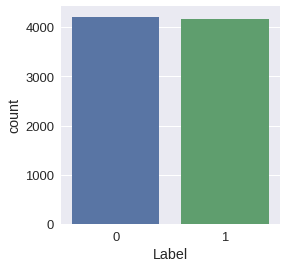

In [0]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

sns.factorplot(x="Label", data=train_data, kind="count")
plt.show();

In [0]:
def build_model():
  
    rate_drop_dense = 0.15 + np.random.rand() * 0.25
    base_model = InceptionV3(
                          weights=None, 
                          input_shape=(224, 224, 1), 
                          pooling='max', 
                          classes=1)

    
    for layer in base_model.layers:
        layer.trainable = True

    x = base_model.output
    x = Dense(1000, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(rate_drop_dense)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dense(500, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(rate_drop_dense)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    predictions = Dense(1,activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model

In [0]:
model = build_model()
nadam=keras.optimizers.Nadam(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
model.compile(loss='binary_crossentropy', optimizer=nadam, metrics=['acc', 'mse'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
NUM_SAMPLES=train_data.shape[0]
VAL_SIZE=val_data.shape[0]
BATCH_SIZE=128
NUM_EPOCHS = 20

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range=5,
    horizontal_flip=True
)

In [0]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_data, 
    directory  = DATASET_DIR,
    x_col = "Path", 
    y_col = "Label", 
    target_size=(224, 224),
    color_mode='grayscale', 
    class_mode='other', 
    batch_size=32
)

Found 8379 images.


In [0]:
val_datagen = ImageDataGenerator(
    rescale = 1. /255)

In [0]:
val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_data, 
    directory  = DATASET_DIR, 
    x_col = "Path", 
    y_col = "Label", 
    target_size=(224, 224),
    color_mode='grayscale', 
    class_mode='other', 
    batch_size=32
)

Found 563 images.


In [0]:
model.fit_generator(
    generator = train_generator, 
    steps_per_epoch = NUM_SAMPLES/BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1, 
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            patience=7, 
            min_delta=0.0001
        ),
        TensorBoard(
            log_dir='Graph_complete', 
            histogram_freq=0, 
            write_graph=True, 
            write_images=True
        )
    ], 
    validation_data=val_generator, 
    validation_steps = VAL_SIZE/BATCH_SIZE,
    shuffle=True
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
66/65 [==============================] - 1485s 22s/step - loss: 161.2491 - acc: 0.5090 - mean_squared_error: 0.2806 - val_loss: 127.2593 - val_acc: 0.5188 - val_mean_squared_error: 0.2497
Epoch 2/20
66/65 [==============================] - 1458s 22s/step - loss: 108.3990 - acc: 0.4853 - mean_squared_error: 0.2800 - val_loss: 88.0488 - val_acc: 0.4625 - val_mean_squared_error: 0.2512
Epoch 3/20
66/65 [==============================] - 1452s 22s/step - loss: 69.2444 - acc: 0.5147 - mean_squared_error: 0.2718 - val_loss: 54.6434 - val_acc: 0.5375 - val_mean_squared_error: 0.2492
Epoch 4/20
66/65 [==============================] - 1430s 22s/step - loss: 40.6314 - acc: 0.4851 - mean_squared_error: 0.2638 - val_loss: 29.7548 - val_acc: 0.4558 - val_mean_squared_error: 0.2507
Epoch 5/20
66/65 [==============================] - 1430s 22s/step - loss: 21.0834 - acc: 0.5090 - mean_squared_error: 0.2539 - val_loss: 14.3041 - val_acc: 0.49

In [0]:
# Save Model
model.save_weights('weight_'+PART_NAME+'.h5')
with open('arch_'+PART_NAME+'.json', 'w') as f:
    f.write(model.to_json())

In [0]:
from google.colab import files
files.download('weight_'+PART_NAME+'.h5')
files.download('arch_'+PART_NAME+'.json')
